In [1]:
from nb_imports import *
%matplotlib inline
import csvReader
import config
import lib

FIELDS = ["comments", "blank_lines", "code", "config", "yaml_encoding_error", "code_with_comments", "lines", "percentage", "stars", "sub", "data", "id"]
dtypes = {"comments":int, "blank_lines":int, "code":int, "config":str, 
          "yaml_encoding_error":str, "code_with_comments":int, "lines":int, "percentage":float, "stars":int, "sub":int, "data":str, "id":int}
# csvfiledata = csvReader.readfile("yaml threaded.csv", fields=FIELDS)

In [2]:
df = pd.read_csv("yaml threaded1.csv", dtype=dtypes)


In [3]:
df.head(5)



,comments,blank_lines,code,config,lang,yaml_encoding_error,code_with_comments,lines,percentage,stars,sub,data,id
0,0,2,9,travis,b'Java',NaN,0,11,0.000000,4039,128,bGFuZ3VhZ2U6IGphdmEKamRrOiBvcmFjbGVqZGs3CmVudj...,44498352
1,0,8,50,travis,b'Python',NaN,1,57,0.000000,4039,118,ZGlzdDogdHJ1c3R5CgpsYW5ndWFnZTogcHl0aG9uCgpjYW...,2337852
2,1,0,19,travis,b'JavaScript',NaN,0,19,5.263158,4039,163,c3VkbzogZmFsc2UKbGFuZ3VhZ2U6IG5vZGVfanMKb3M6Ci...,66830040
3,0,8,28,circleci,b'JavaScript',NaN,0,36,0.000000,4039,163,dmFyXzE6ICZjYWNoZV9rZXkgc2FuLWRlcGVuZGVuY3ktY2...,66830040
4,0,6,135,travis,b'C',NaN,36,105,0.000000,4038,233,bGFuZ3VhZ2U6IHN3aWZ0Cnhjb2RlX3dvcmtzcGFjZTogUH...,12416862


In [4]:
df.describe()

,comments,blank_lines,code,code_with_comments,lines,percentage,stars,sub,id
count,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6719.000000,6.719000e+03
mean,1.218634,5.635214,47.947611,2.107308,51.475517,2.015266,4671.352880,193.271022,4.244331e+07
std,5.800953,8.913054,116.139377,7.313704,117.472145,6.295667,6761.694355,299.199836,4.447869e+07
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1080.000000,2.000000,2.700000e+01
25%,0.000000,1.000000,13.000000,0.000000,15.000000,0.000000,1476.000000,55.000000,7.359283e+06
50%,0.000000,4.000000,24.000000,0.000000,27.000000,0.000000,2620.000000,104.000000,2.694732e+07
75%,0.000000,7.000000,47.000000,1.000000,52.000000,0.000000,4913.000000,210.000000,6.363980e+07
max,276.000000,281.000000,5617.000000,209.000000,5583.000000,65.671642,92440.000000,5075.000000,2.205177e+08


In [5]:
df.sample(1000).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1249 to 771
Data columns (total 13 columns):
comments               1000 non-null int32
blank_lines            1000 non-null int32
code                   1000 non-null int32
config                 1000 non-null object
lang                   989 non-null object
yaml_encoding_error    4 non-null object
code_with_comments     1000 non-null int32
lines                  1000 non-null int32
percentage             1000 non-null float64
stars                  1000 non-null int32
sub                    1000 non-null int32
data                   1000 non-null object
id                     1000 non-null int32
dtypes: float64(1), int32(8), object(4)
memory usage: 78.1+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6719 entries, 0 to 6718
Data columns (total 13 columns):
comments               6719 non-null int32
blank_lines            6719 non-null int32
code                   6719 non-null int32
config                 6719 non-null object
lang                   6647 non-null object
yaml_encoding_error    21 non-null object
code_with_comments     6719 non-null int32
lines                  6719 non-null int32
percentage             6719 non-null float64
stars                  6719 non-null int32
sub                    6719 non-null int32
data                   6719 non-null object
id                     6719 non-null int32
dtypes: float64(1), int32(8), object(4)
memory usage: 472.6+ KB


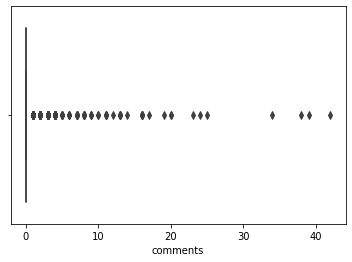

In [7]:
sns.boxplot(x="comments", data=df.sample(1000))

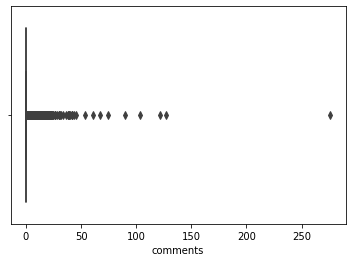

In [8]:
sns.boxplot(x="comments",data=df)

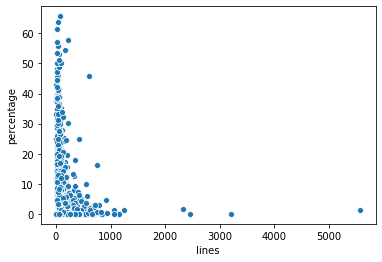

In [9]:
sns.scatterplot(x=df['lines'], y=df['percentage'])

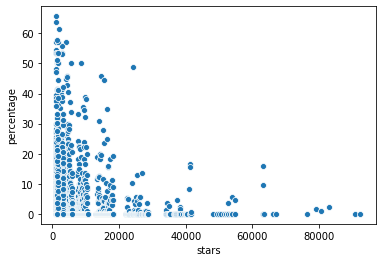

In [11]:
sns.scatterplot(x=df['stars'], y=df['percentage'])


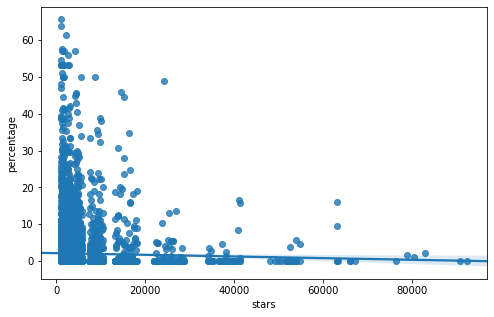

In [12]:
plt.figure(figsize=(8, 5))
sns.regplot(x="stars", y="percentage", data=df);

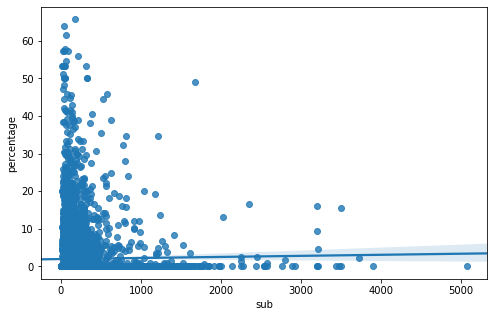

In [13]:
plt.figure(figsize=(8, 5))
sns.regplot(x="sub", y="percentage", data=df);

There is a very minor increase in number of comments per line of yaml configuration for build systems. This is particularly the case in projects which have more subscribers than stars.

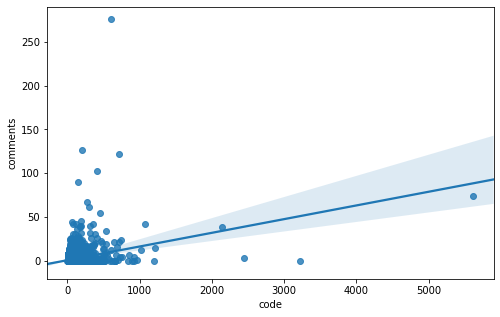

In [14]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=df);

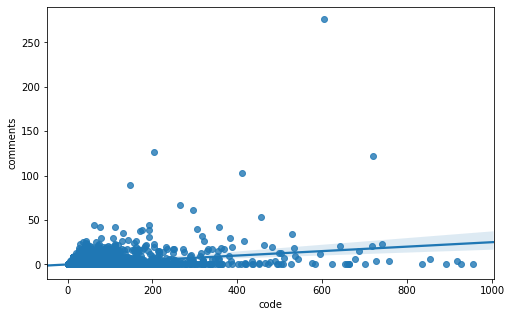

In [16]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=df[df.code < 1000]);

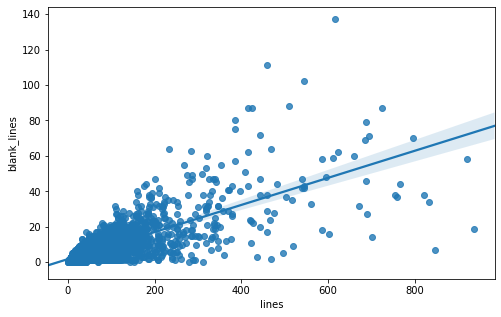

In [17]:
plt.figure(figsize=(8, 5))
sns.regplot(x="lines", y="blank_lines", data=df[df.lines < 1000]);

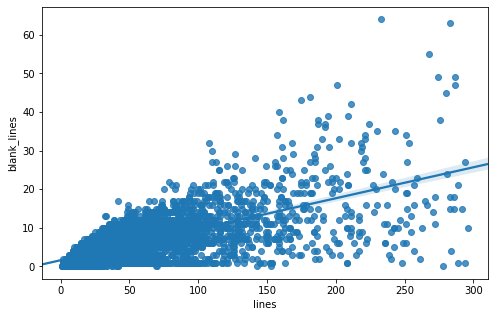

In [18]:
plt.figure(figsize=(8, 5))
sns.regplot(x="lines", y="blank_lines", data=df[df.lines < 300]);

There is a very minor increase in number of comments per line of yaml configuration for build systems. This is particularly the case in projects which have more subscribers than stars.

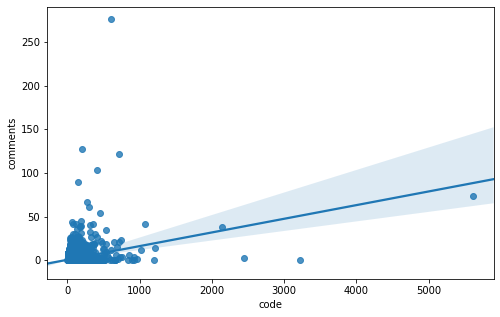

In [20]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=df);

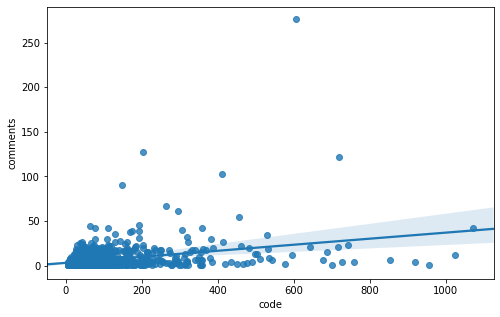

In [21]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=df[(df.code< 1200) & (df.comments != 0)]);

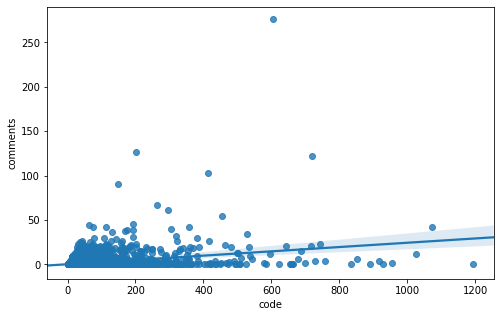

In [22]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=df[df.code
                                            < 1200]);

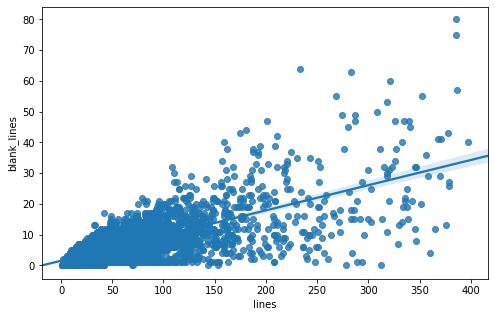

In [27]:
plt.figure(figsize=(8, 5))
sns.regplot(x="lines", y="blank_lines", data=df[df.lines < 400]);

# note

Really interesting observation is that the graphs above the y=x line is roughly where the data stops. Therefore its all over the place and it would be good to plot that line to get a better idea of what is happening.

In order to do this use: https://stackoverflow.com/questions/36146684/using-seaborn-how-can-i-draw-a-line-of-my-choice-across-my-scatterplot as a setup.

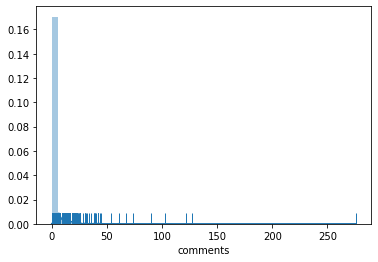

In [28]:
sns.distplot(df["comments"], rug=True)

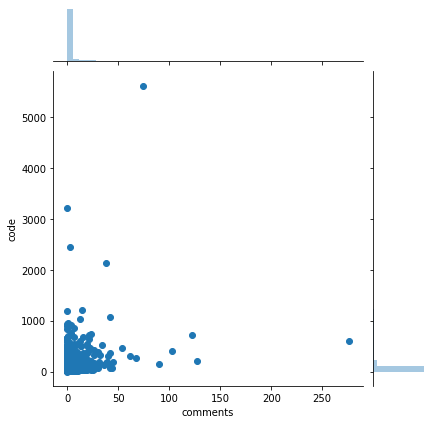

In [29]:
sns.jointplot(x="comments", y="code", data=df);

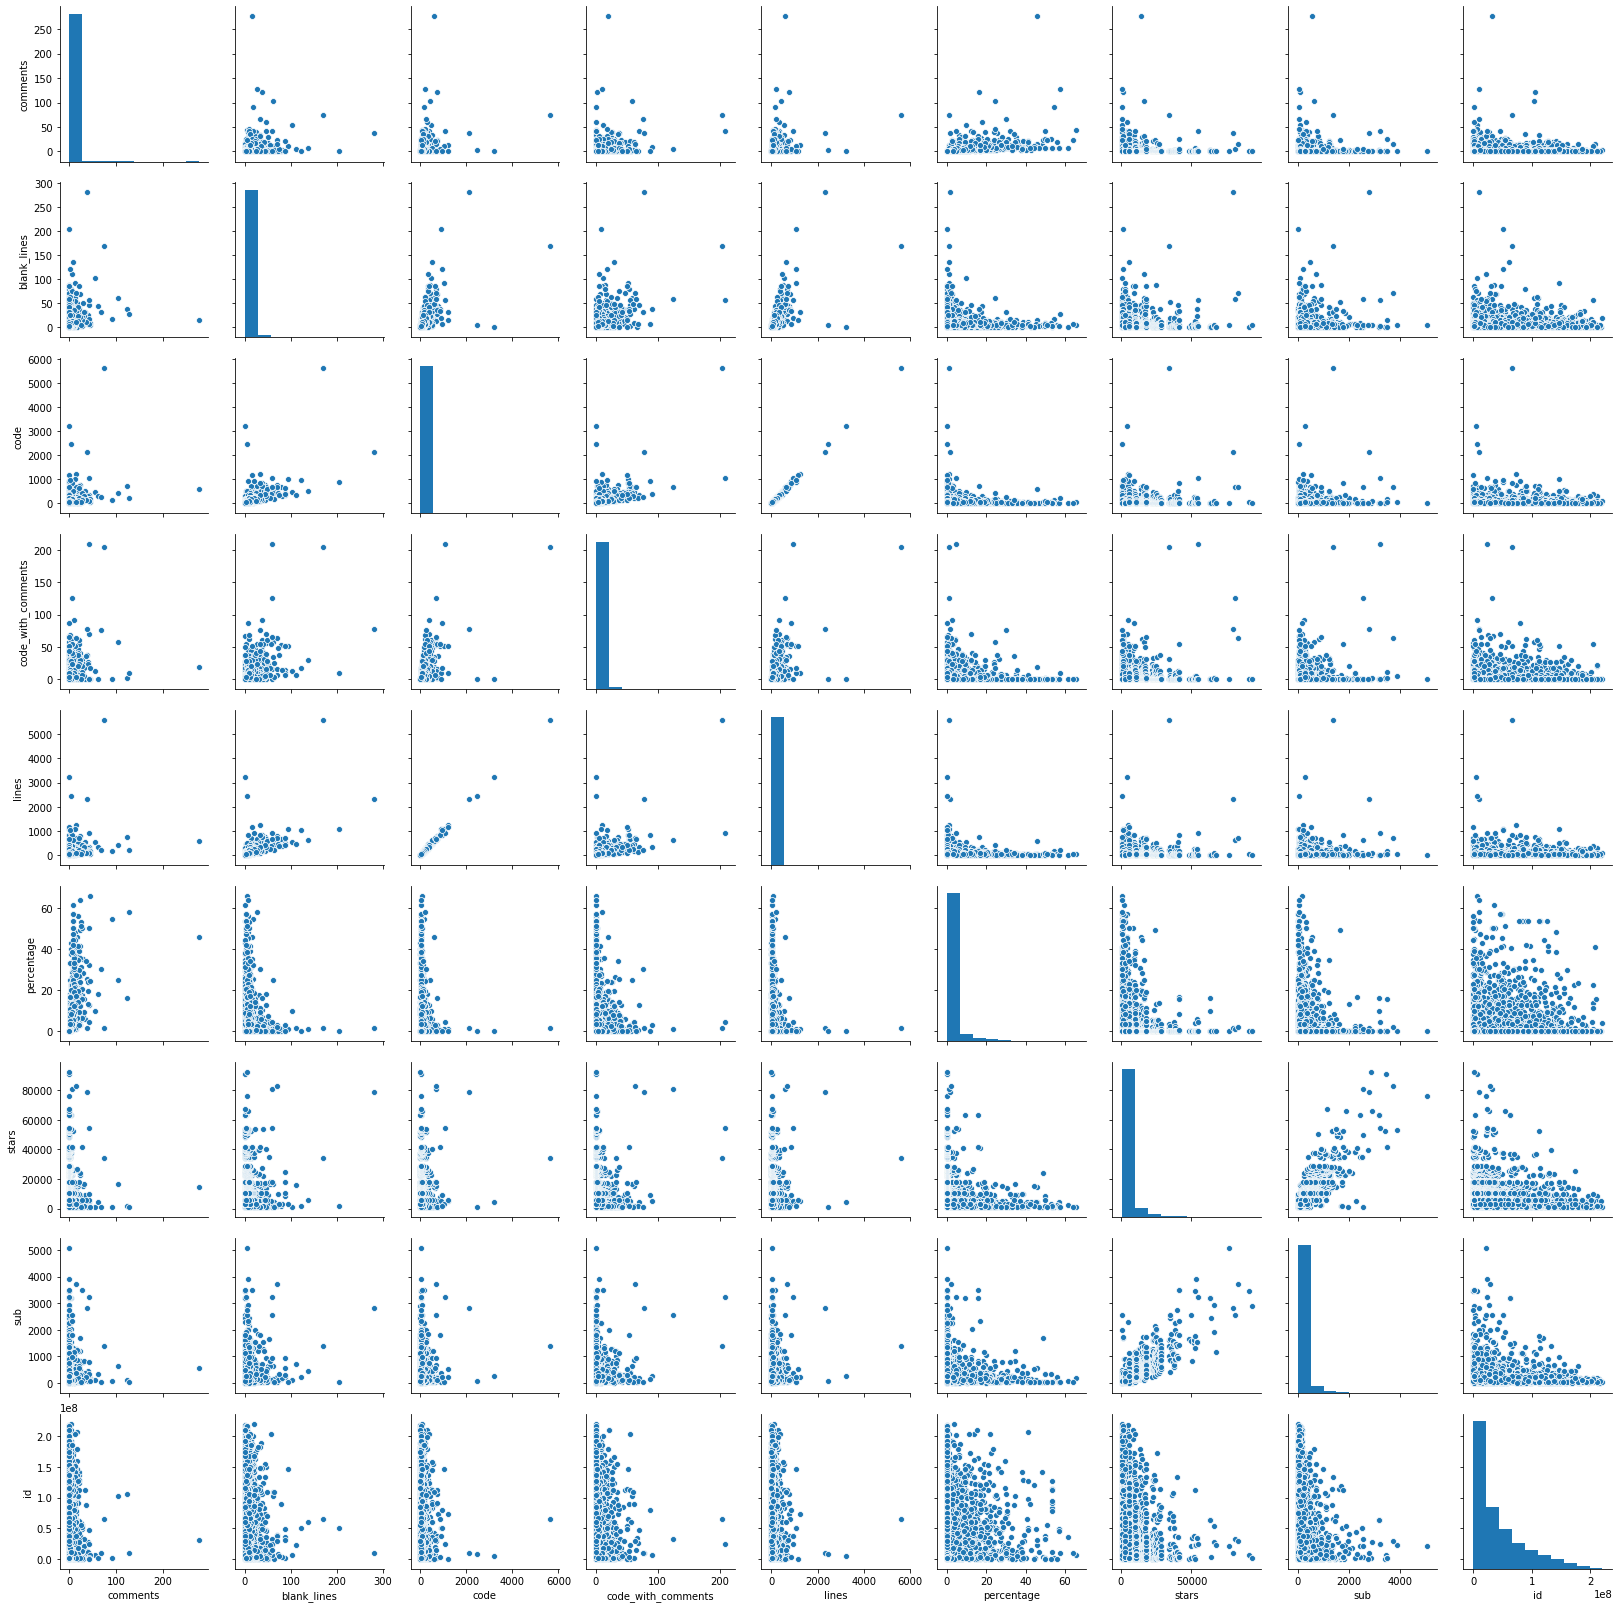

In [30]:
sns.pairplot(df);

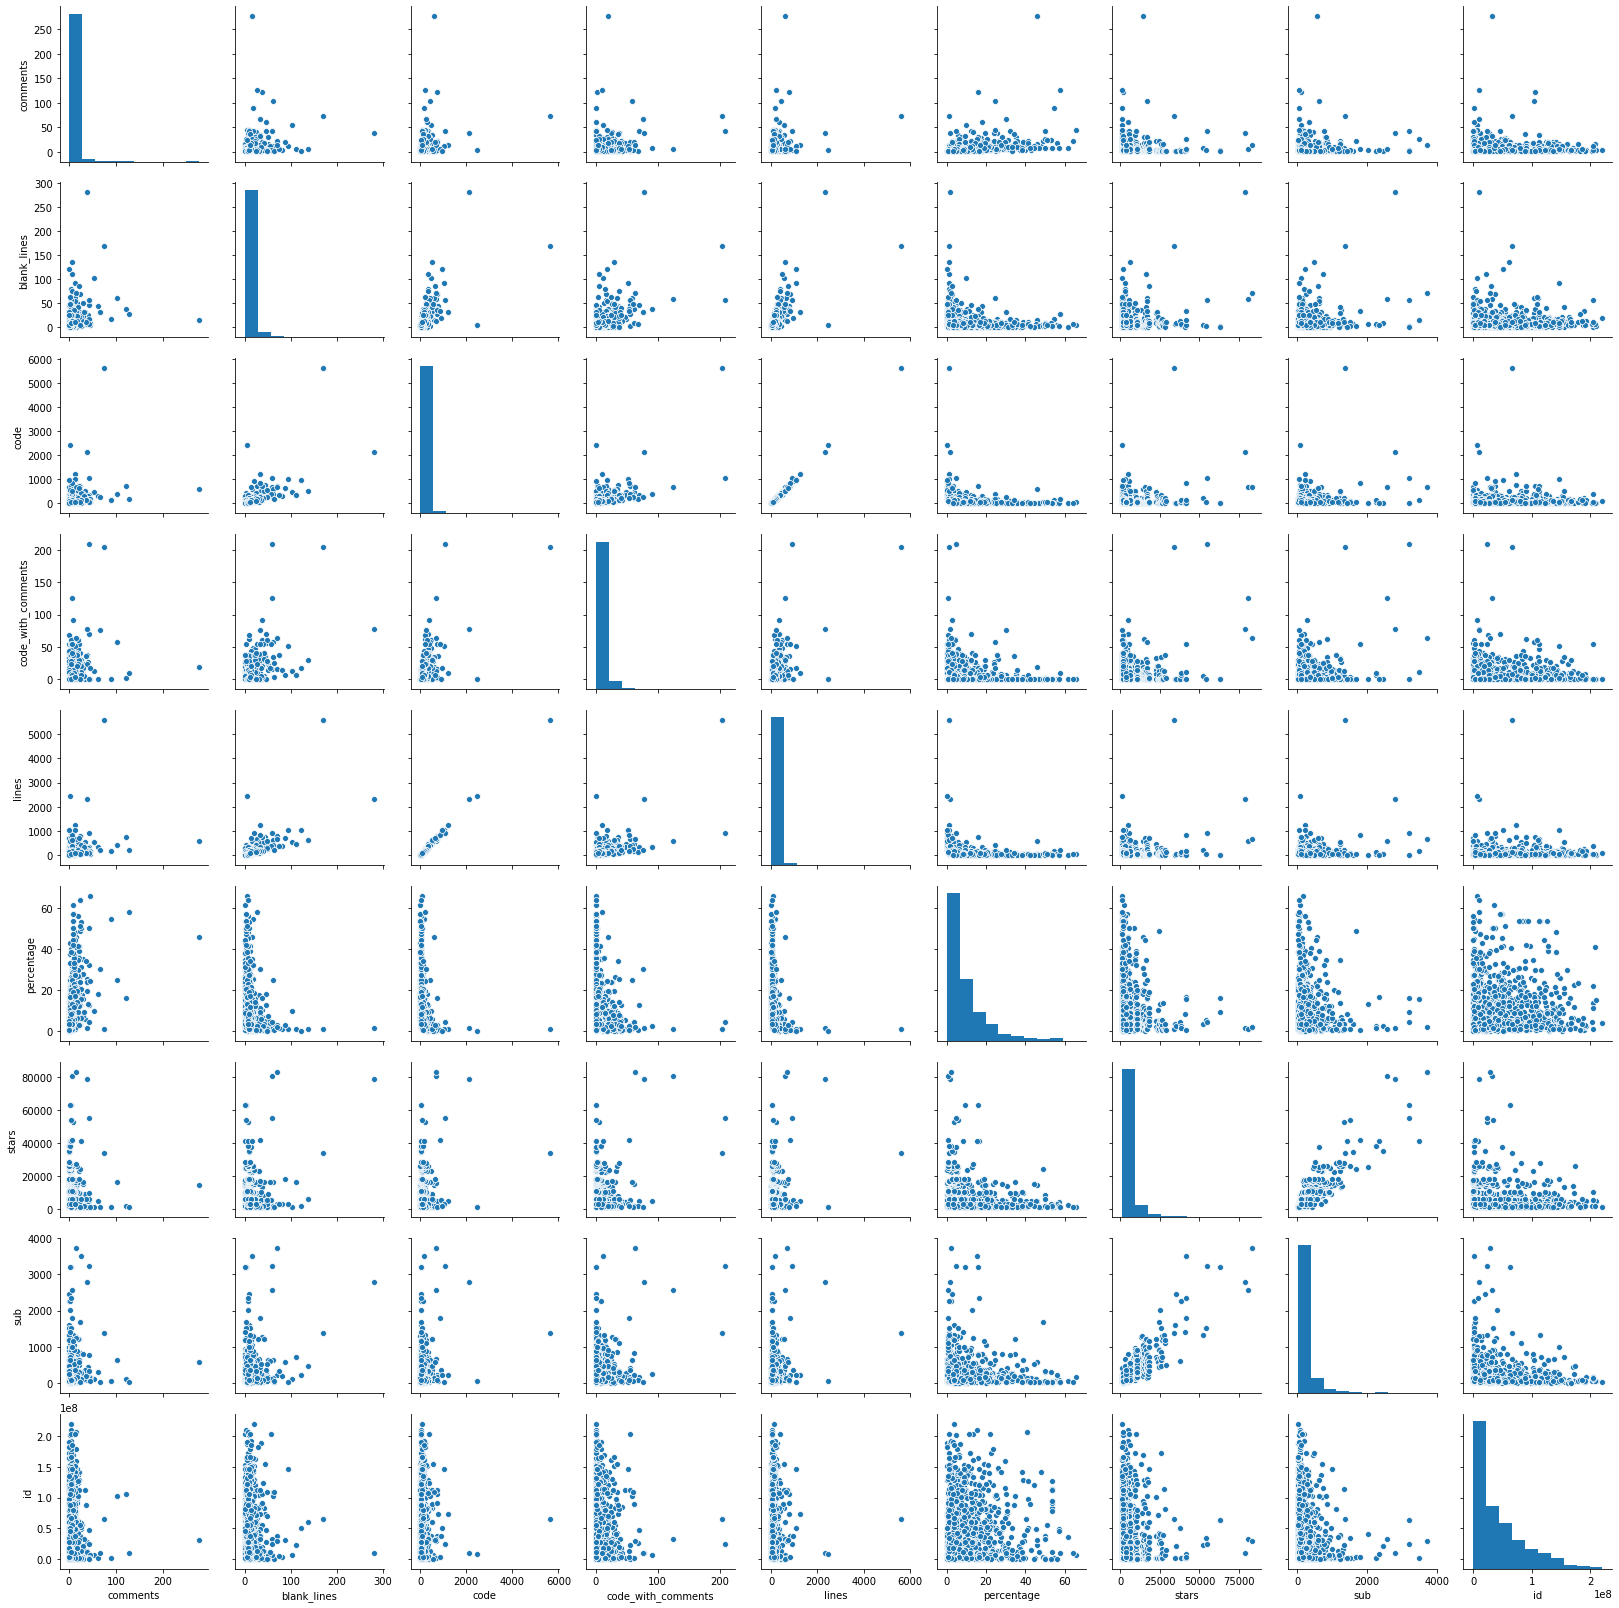

In [31]:
sns.pairplot(df[df.comments != 0]);

## interesting

It seems that for most of them although the empty comments have been removed it still is just noise.

In [37]:
df.code

0         9
1        50
2        19
3        28
4       135
       ... 
6714     57
6715     37
6716      6
6717     76
6718     49
Name: code, Length: 6719, dtype: int32

In [54]:
_temp = df[(df.code.notnull())]
_temp = _temp[_temp.code != 0]

In [55]:
_temp.code = np.log2(_temp.code)

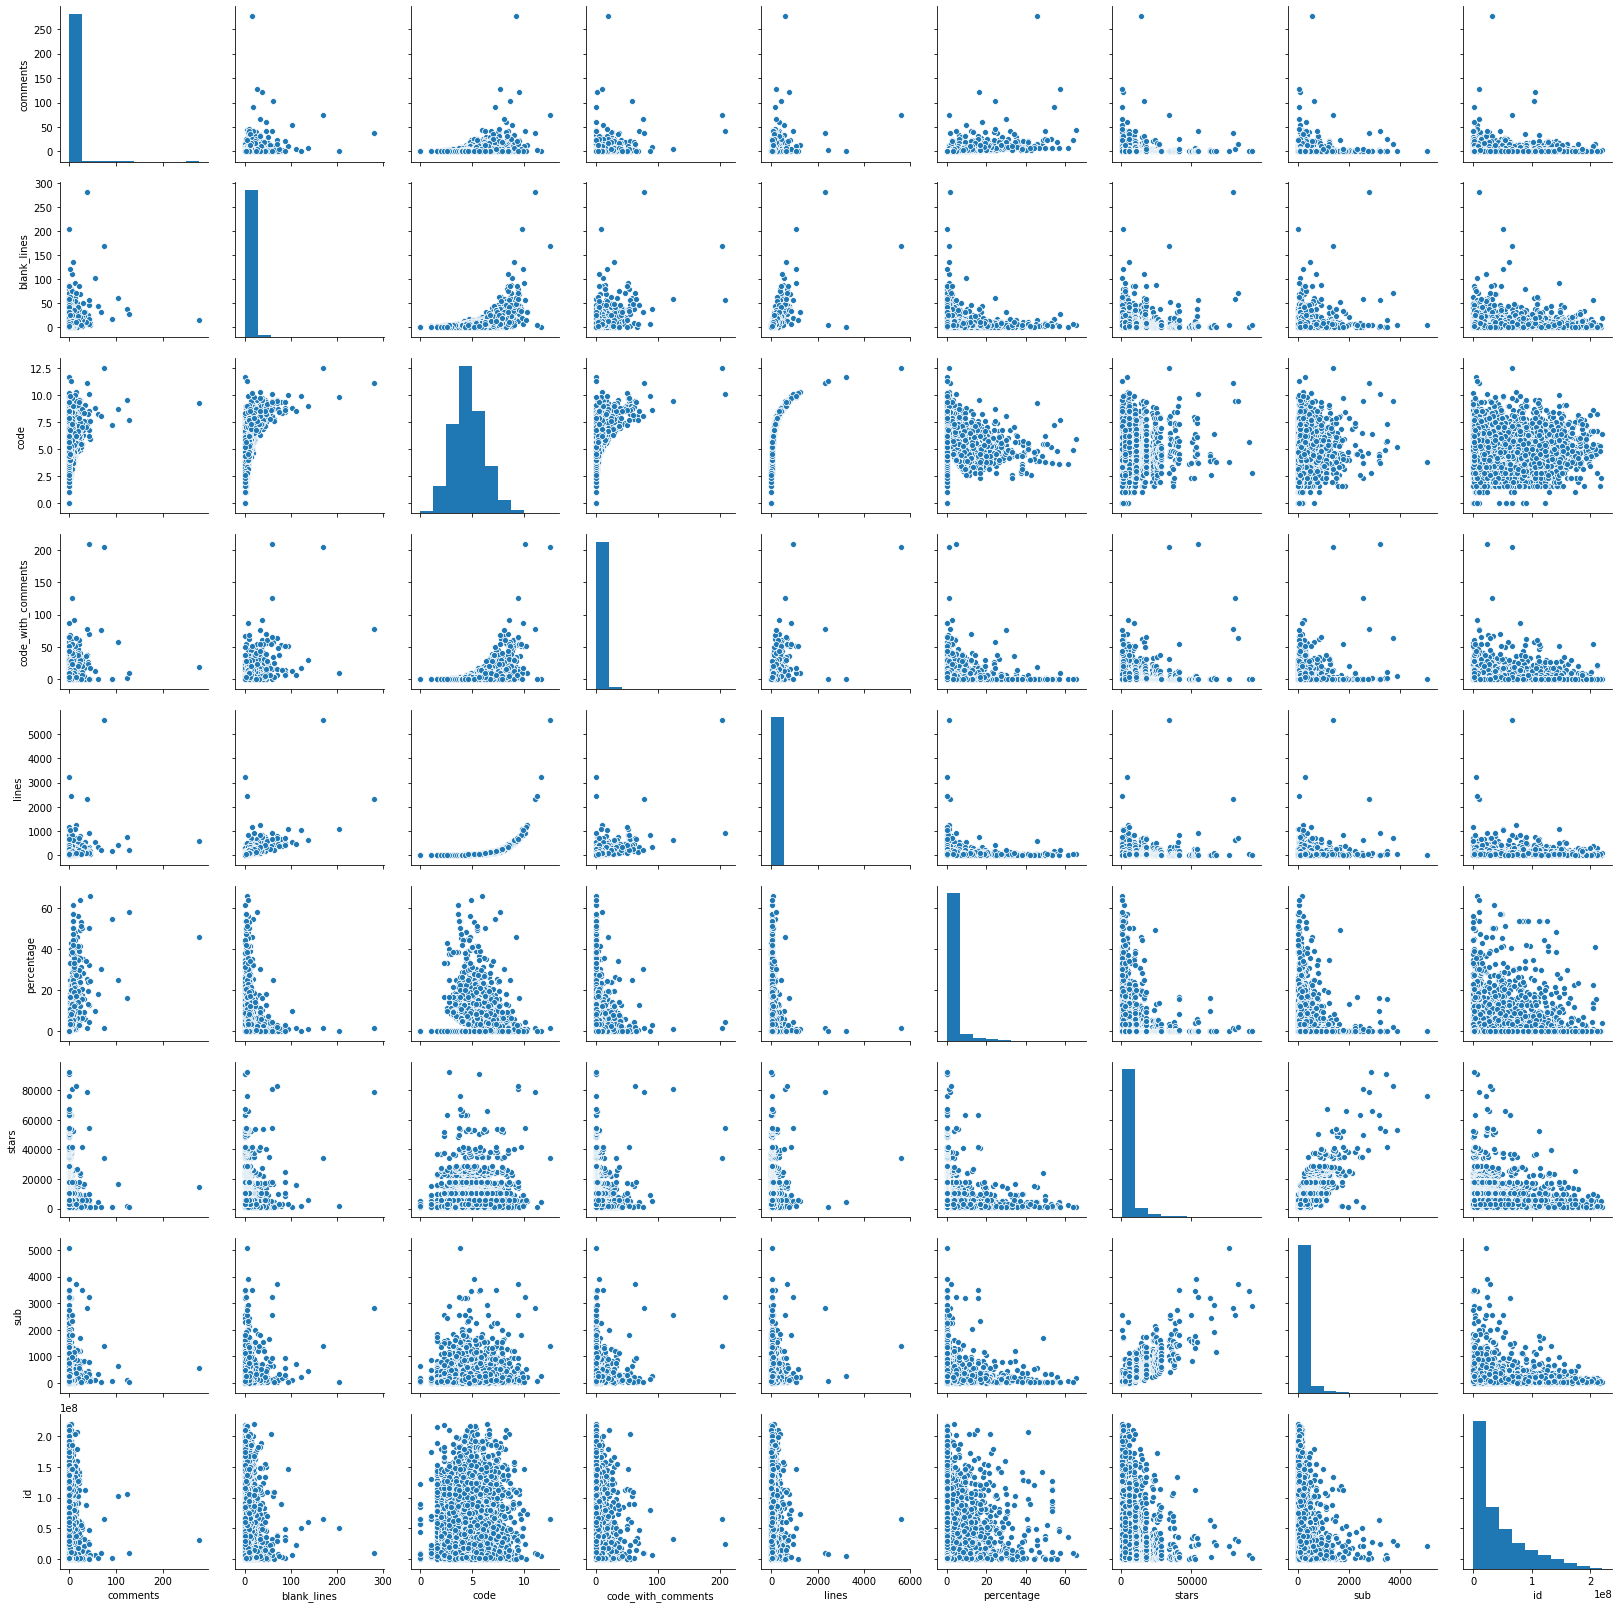

In [56]:
sns.pairplot(_temp);

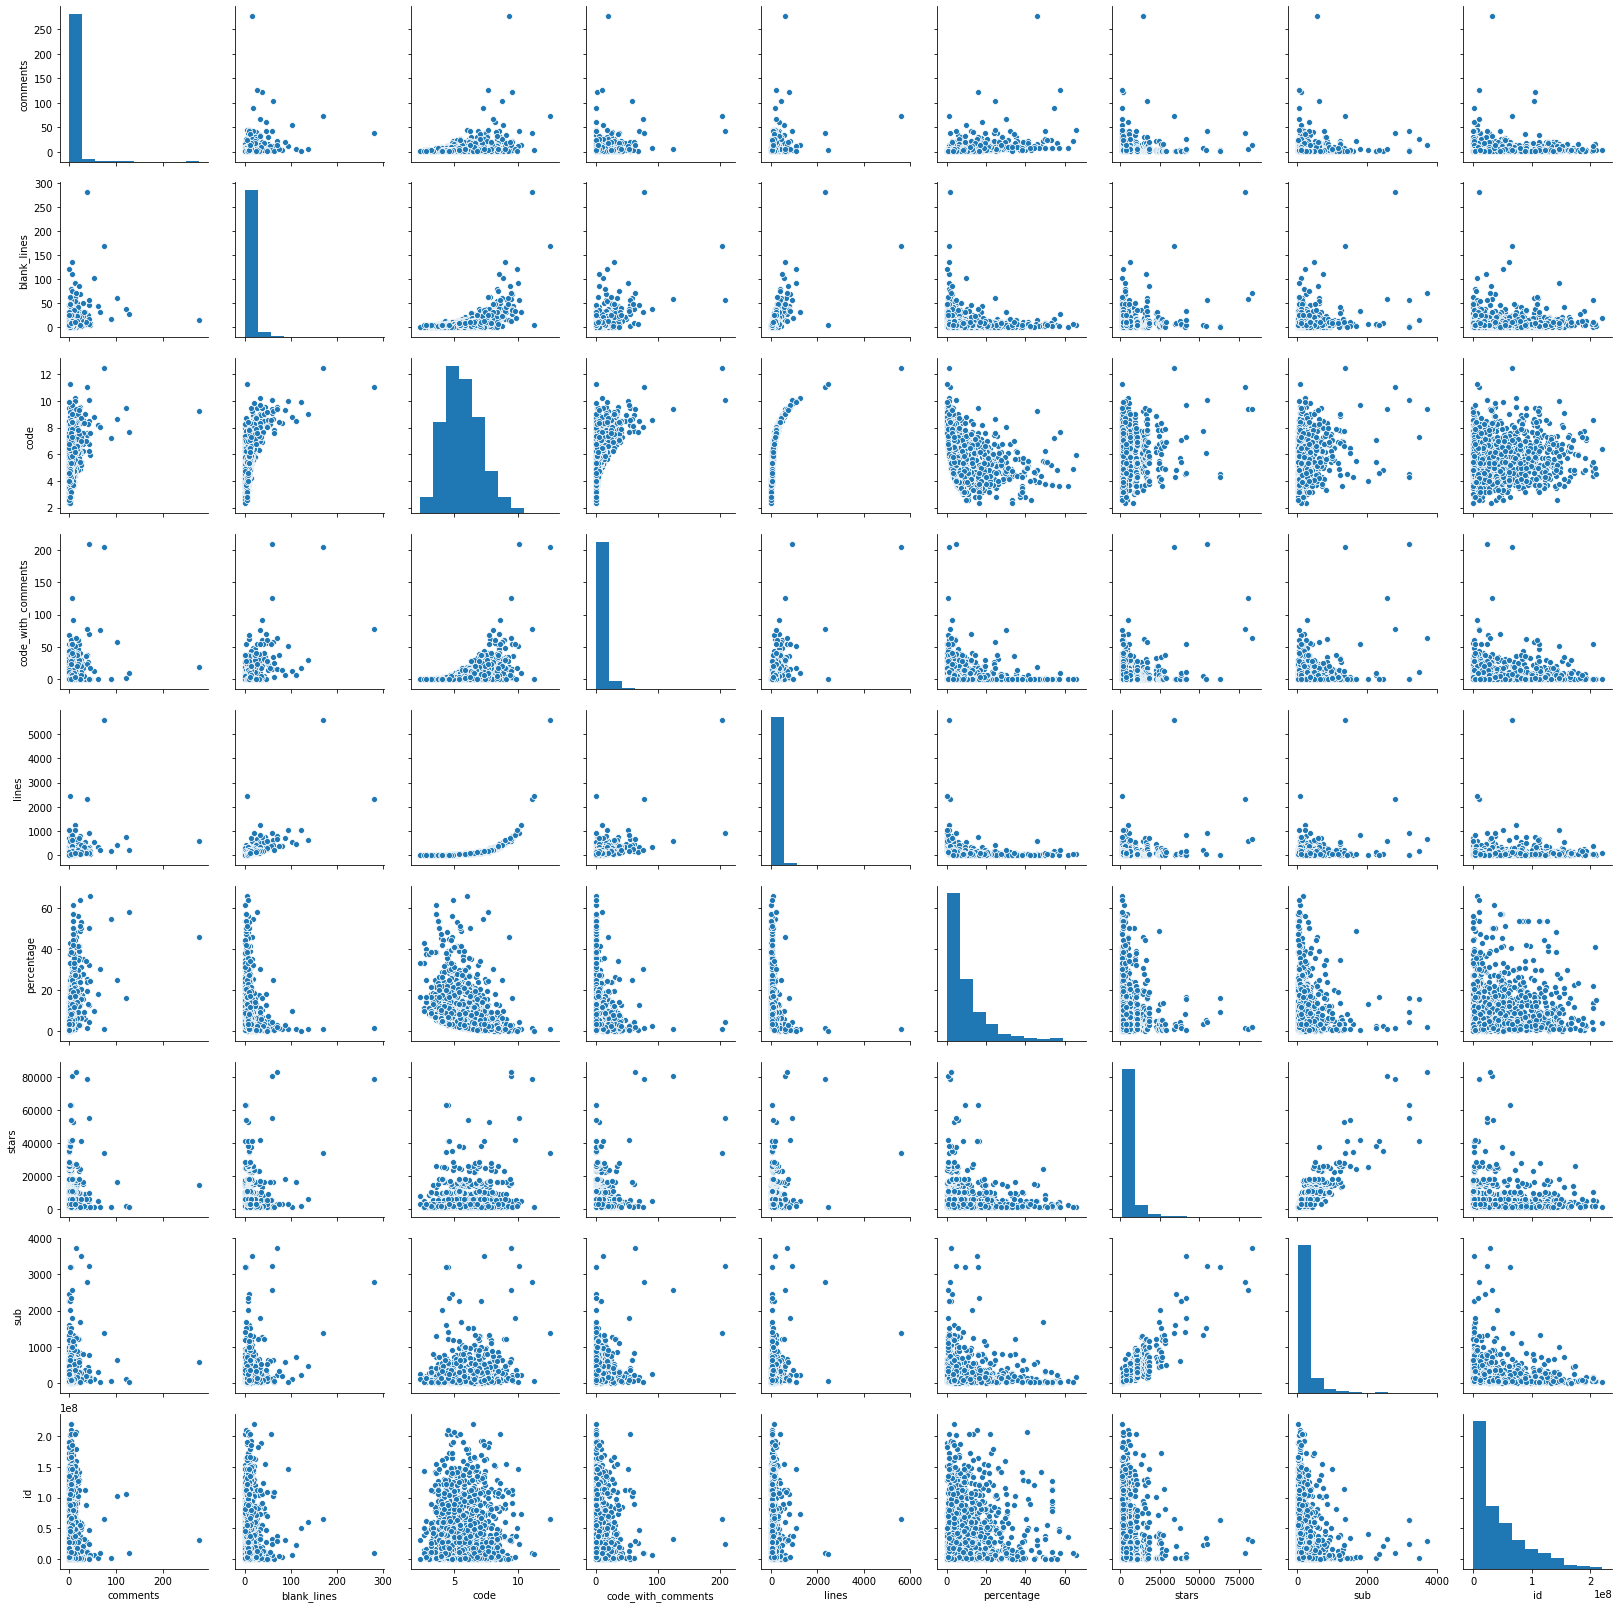

In [46]:
sns.pairplot(_temp[_temp.comments != 0]);

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=_temp);

In [ ]:
def log(data, column, y):
    _data = data[data[column].notnull()]
    _data[column] = np.log2(_data[column])
    return sns.regplot(x=column, y=y, data=_data)

In [ ]:
log(df, "code", "blank_lines")

In [ ]:
log(df, "stars", "sub")

In [ ]:
df.columns

In [ ]:
log(df[df.comments != 0], "comments", "code_with_comments")

In [ ]:
log(df[df.comments != 0], "code_with_comments", "comments")